## Ensemble classifiers

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, BaggingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone

from sklearn.model_selection import cross_val_score
from sklearn import tree
from IPython.display import SVG
#from graphviz import Source
from IPython.display import display

In [33]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [89]:
import urllib.request

filepath = "../dataset/"
url = "https://tvml.github.io/ml2324/dataset/"

def get_file(filename,local):
    if local:
        return filepath+filename
    else:
        urllib.request.urlretrieve (url+filename, filename)
        return filename

In [90]:
n_classes = 3
plot_colors = [colors[0], colors[1], colors[2]]
cMap = mcolors.ListedColormap(colors[0:3])
plot_step = 0.02

In [91]:
df = pd.read_csv(get_file("knnClassify3c.csv", local=0), delimiter=';')
dft = pd.read_csv(get_file("knnClassify3c-test.csv", local=0), delimiter=';')
df_all = pd.concat([df,dft])

In [22]:
x1min=min(min(df.x1),min(dft.x1))
x1max=max(max(df.x1),max(dft.x1))
x2min=min(min(df.x2),min(dft.x2))
x2max=max(max(df.x2),max(dft.x2))


x = np.linspace(x1min,x1max, 100)
y = np.linspace(x2min,x2max, 100)

xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]


x_train=np.asarray(df[['x1','x2']])
y_train=df['class']
x_test=np.asarray(dft[['x1','x2']])
y_test=dft['class']

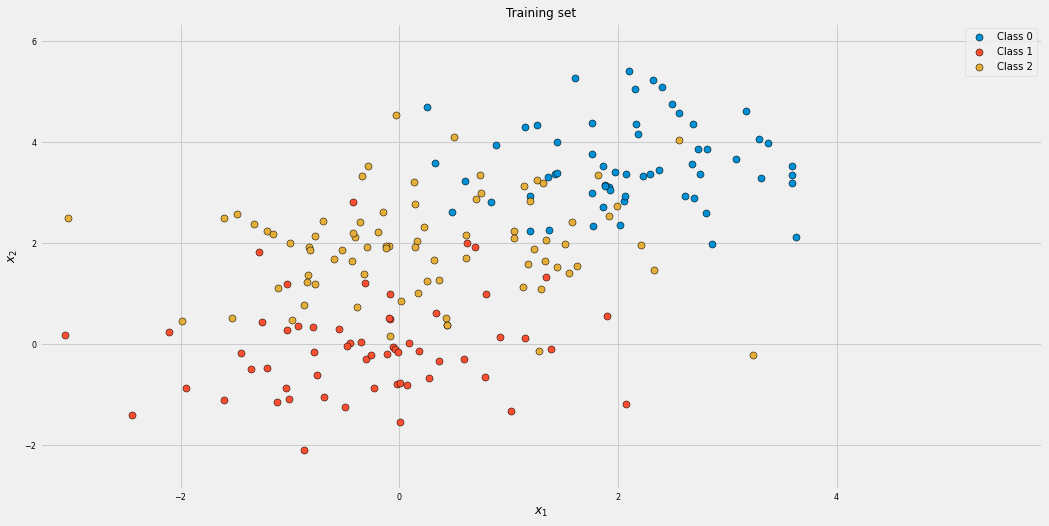

In [35]:
d = df
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=50, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Training set', fontsize=12)
plt.legend()
plt.show()

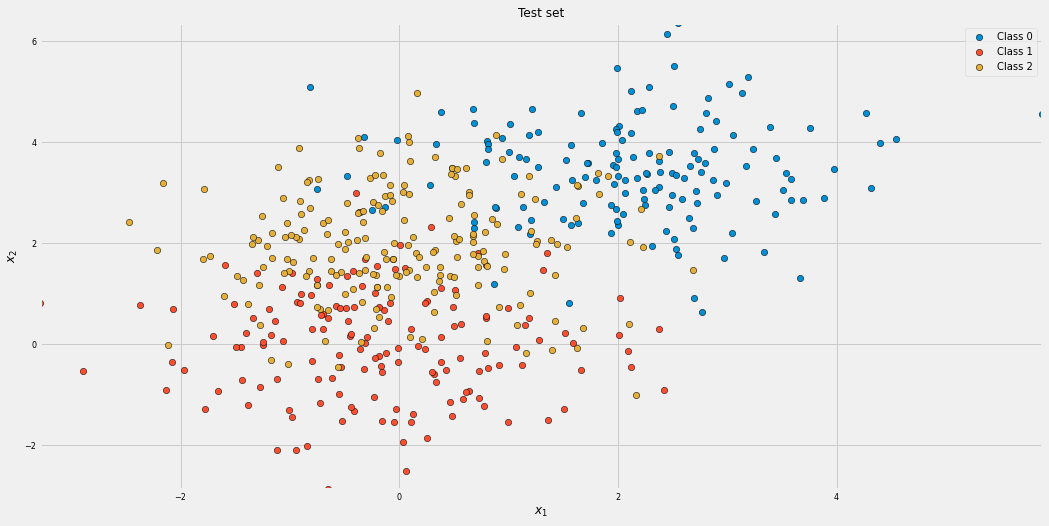

In [37]:
d = dft
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Test set', fontsize=12)
plt.legend()
plt.show()

### Decision tree

Istanziazione con profondità massima maxdepth, apprendimento sul training set e valutazione accuracy sia su training che su test set

In [38]:
maxdepth=4
clf = DecisionTreeClassifier(max_depth=maxdepth)

clf = clf.fit(df[['x1','x2']], df['class'])

scores_train = clf.score(df[['x1','x2']], df['class'])
scores_test = clf.score(dft[['x1','x2']], dft['class'])

In [12]:
#dot_data = tree.export_graphviz(clf, out_file=None, 
#                    feature_names=['x1','x2'],
#                     filled=True, rounded=True, 
#                     impurity = False,
#                    proportion = True,
#                     special_characters=True)  
#graph = graphviz.Source(dot_data)

In [13]:
#display(SVG(graph.pipe(format='svg')))

Visualizza training set e partizione dello spazio delle feature indotta dall'albero 

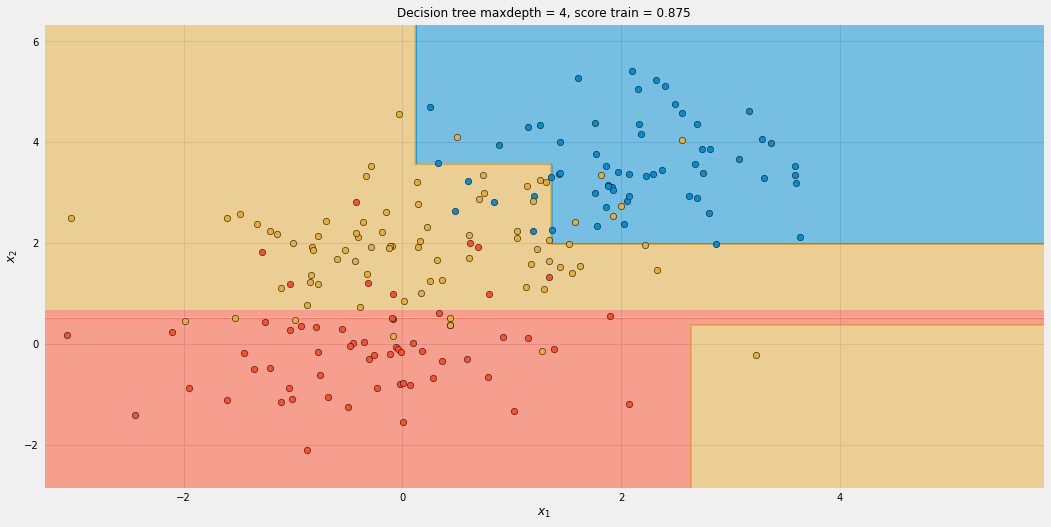

In [42]:
d = df
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cMap, alpha=.5)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', 
                alpha=1, label='Class {0:d}'.format(cl-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Decision tree maxdepth = {0:d}, score train = {1:3.3f}'.format(maxdepth, scores_train), 
          fontsize=12)
plt.show()

Visualizza test set e partizione dello spazio delle feature indotta dall'albero 

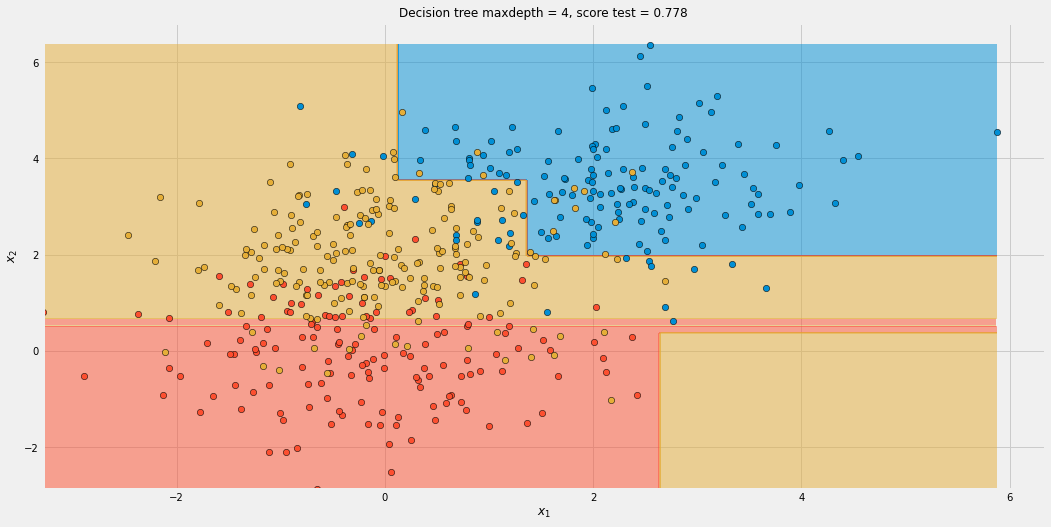

In [43]:
d = dft
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cMap, alpha=.5)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Decision tree maxdepth = {0:d}, score test = {1:3.3f}'.format(maxdepth, scores_test), fontsize=12)
plt.show()

Model selection: cross validation sull'intero dataset con valutazione accuracy media al variare di maxdepth

In [44]:
scores = []
r = range(1,31)
for k in r:
    score = cross_val_score(estimator=DecisionTreeClassifier(max_depth=k, random_state=0), X=df_all[['x1','x2']], y=df_all['class'], cv=10, scoring='accuracy')
    scores.append(score.mean())

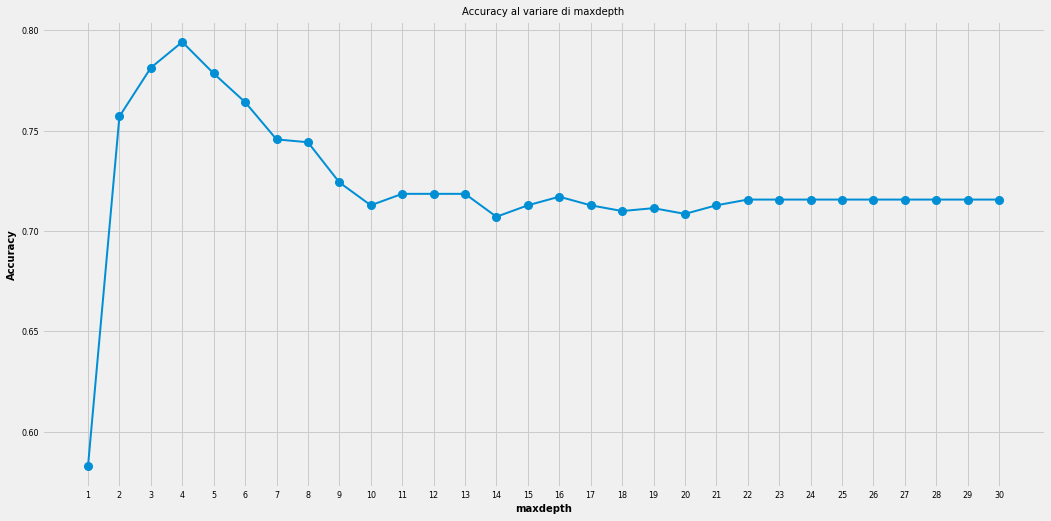

In [45]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.plot(r, scores, marker='o') 
plt.xlabel(r'maxdepth')
plt.ylabel('Accuracy')
plt.xticks(r)
plt.title(r'Accuracy al variare di maxdepth')
plt.show()

### Bagging

Istanziazione con numero di classificatori e, apprendimento sul training set e valutazione accuracy sia su training che su test set

In [70]:
n_estimators = 15
md = 3
classifier = DecisionTreeClassifier(max_depth=md)

clf = BaggingClassifier(classifier,n_estimators=n_estimators)

clf = clf.fit(df[['x1','x2']], df['class'])

scores_train = clf.score(df[['x1','x2']], df['class'])
scores_test = clf.score(dft[['x1','x2']], dft['class'])

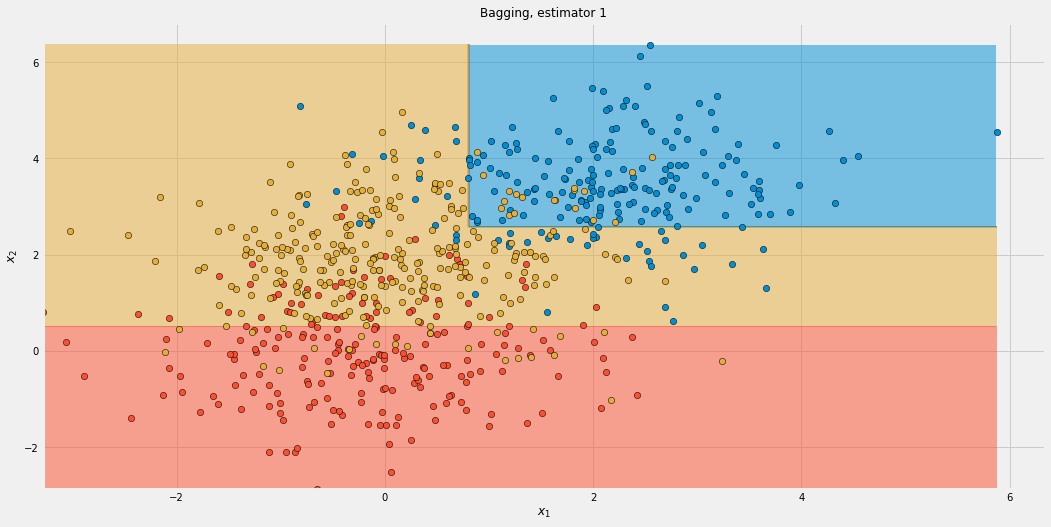

In [57]:
est_n = 1
d = df_all
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
estimator_alpha = .5
t = clf.estimators_[est_n]
Z = t.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cMap)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title("Bagging, estimator {0:d}".format(est_n), fontsize=12)
plt.show()

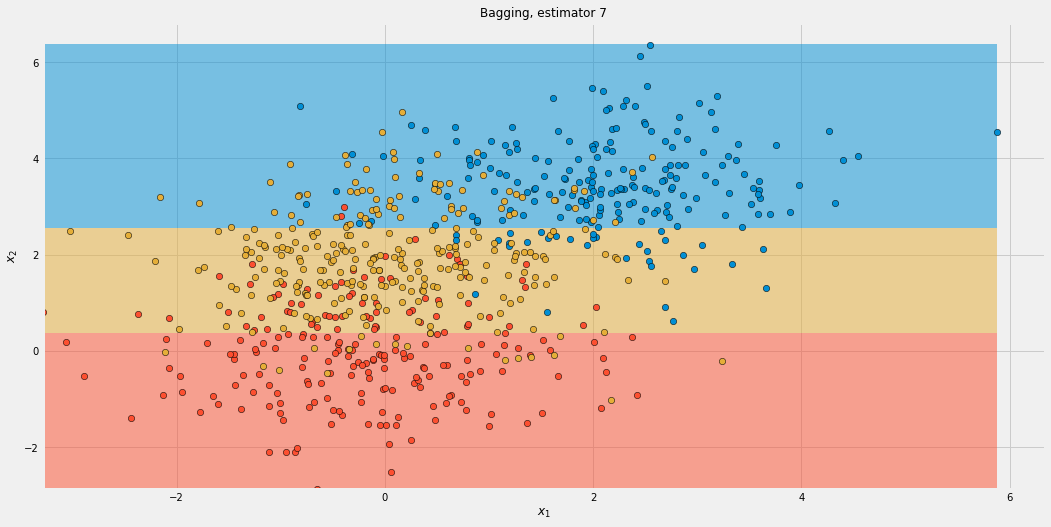

In [58]:
est_n1 = 7
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
estimator_alpha = .5
t = clf.estimators_[est_n1]
Z = t.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cMap)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title("Bagging, estimator {0:d}".format(est_n1), fontsize=12)
plt.show()

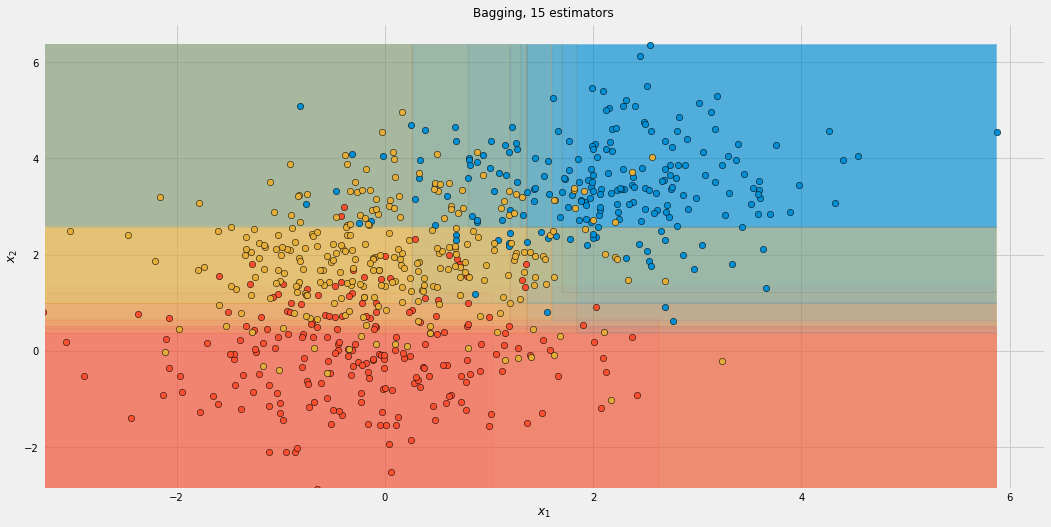

In [59]:
d = df_all
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
estimator_alpha = 1.0 / len(clf.estimators_)
for t in clf.estimators_:
    Z = t.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cMap)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title("Bagging, {0:d} estimators".format(n_estimators), fontsize=12)
plt.show()

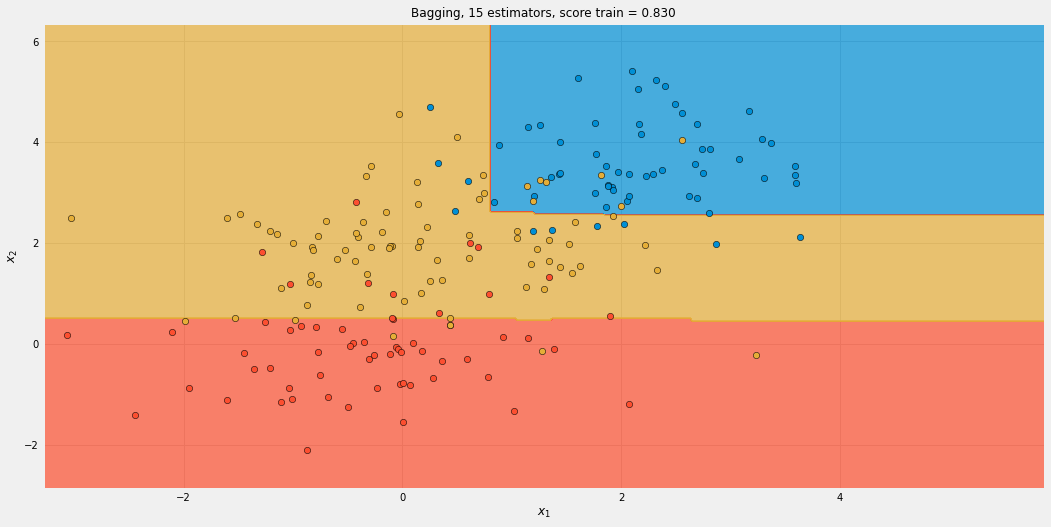

In [60]:
d = df
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
estimator_alpha = 0.7
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cMap)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title("Bagging, {0:d} estimators, score train = {1:3.3f}".format(n_estimators, scores_train), fontsize=12)
plt.show()

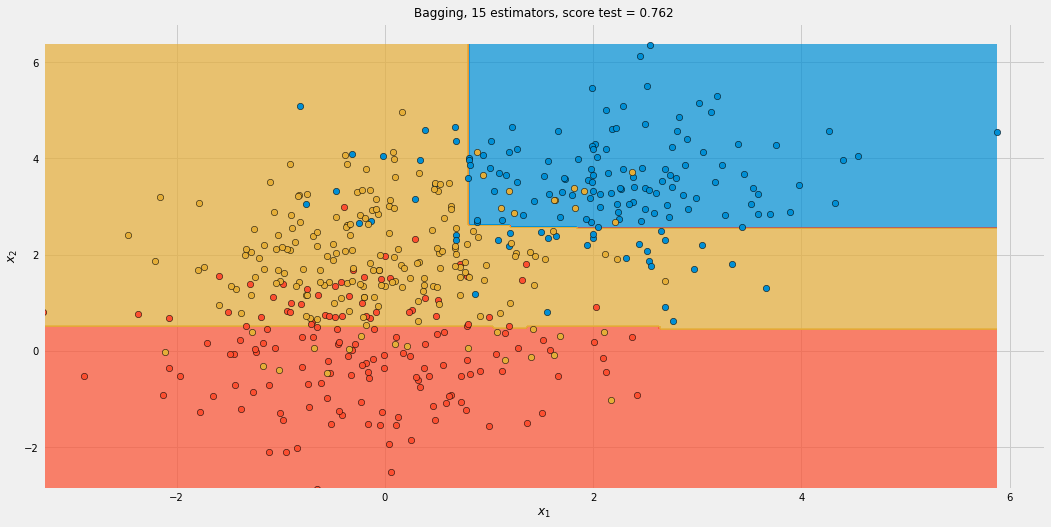

In [61]:
d = dft
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
estimator_alpha = 0.7
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cMap)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title("Bagging, {0:d} estimators, score test = {1:3.3f}".format(n_estimators, scores_test), fontsize=12)
plt.show()

In [71]:
scores = []
r = range(1,30)
for k in r:
    score = cross_val_score(estimator=BaggingClassifier(DecisionTreeClassifier(max_depth=md),n_estimators=k), X=df_all[['x1','x2']], y=df_all['class'], cv=10, scoring='accuracy')
    scores.append(score.mean())

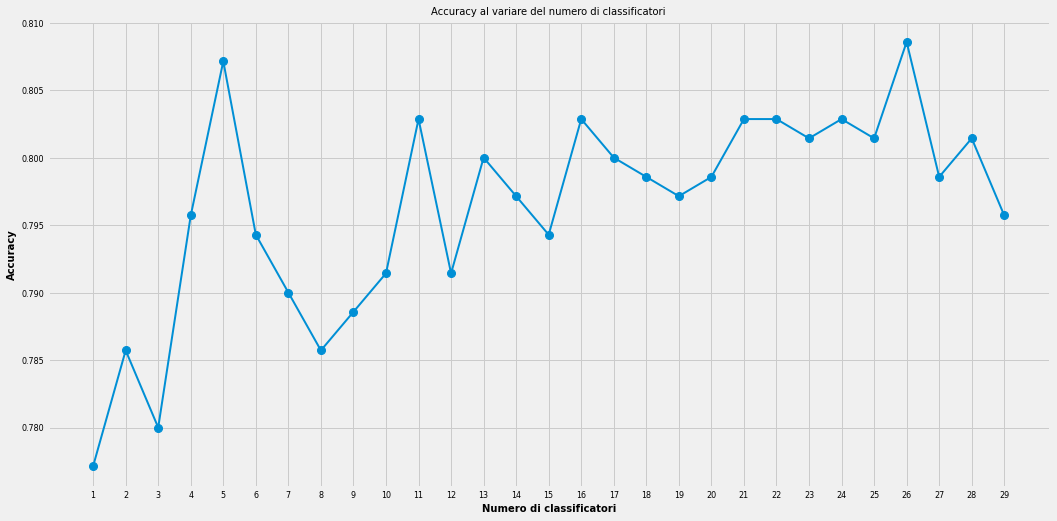

In [72]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.plot(r, scores, marker='o') 
plt.xlabel(r'Numero di classificatori')
plt.ylabel('Accuracy')
plt.xticks(r)
plt.title(r'Accuracy al variare del numero di classificatori')
plt.show()

In [73]:
n_estimators = 10
clf = RandomForestClassifier(n_estimators=n_estimators,max_depth=3)

clf = clf.fit(df[['x1','x2']], df['class'])

scores_train = clf.score(df[['x1','x2']], df['class'])
scores_test = clf.score(dft[['x1','x2']], dft['class'])

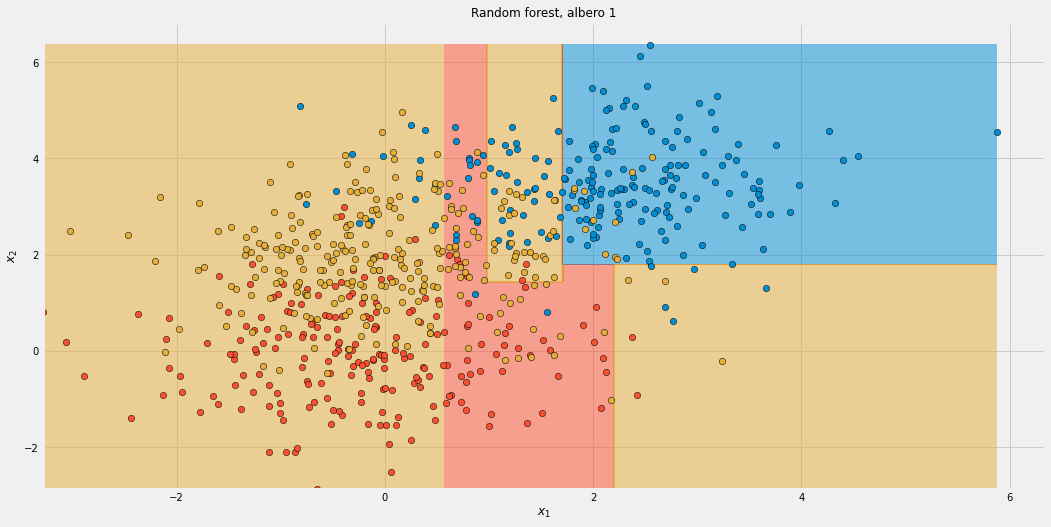

In [75]:
est_n = 1
d = df_all
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
estimator_alpha = .5
tree = clf.estimators_[est_n]
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cMap)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title("Random forest, albero {0:d}".format(est_n), fontsize=12)
plt.show()

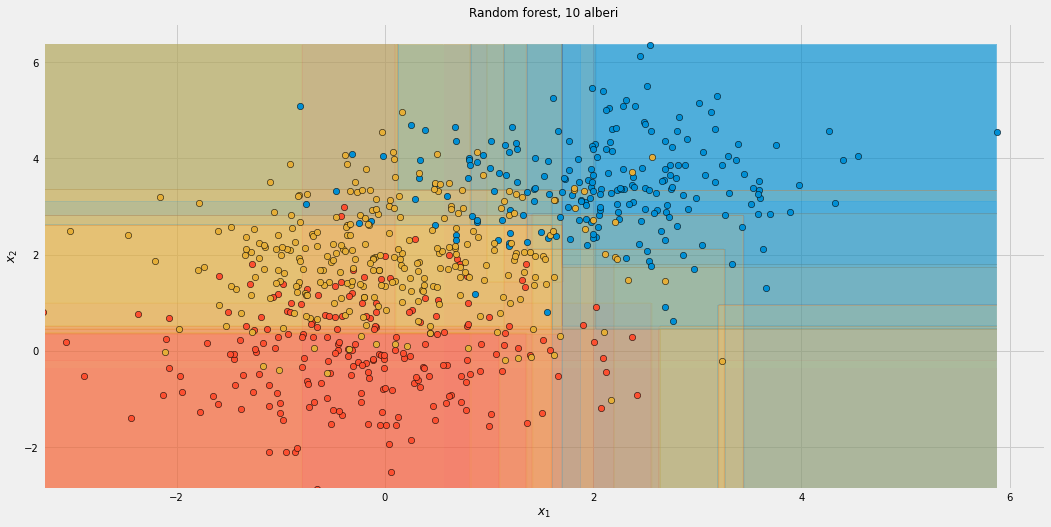

In [76]:
d = df_all
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
estimator_alpha = 1.0 / len(clf.estimators_)
for tree in clf.estimators_:
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cMap)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title("Random forest, {0:d} alberi".format(n_estimators), fontsize=12)
plt.show()

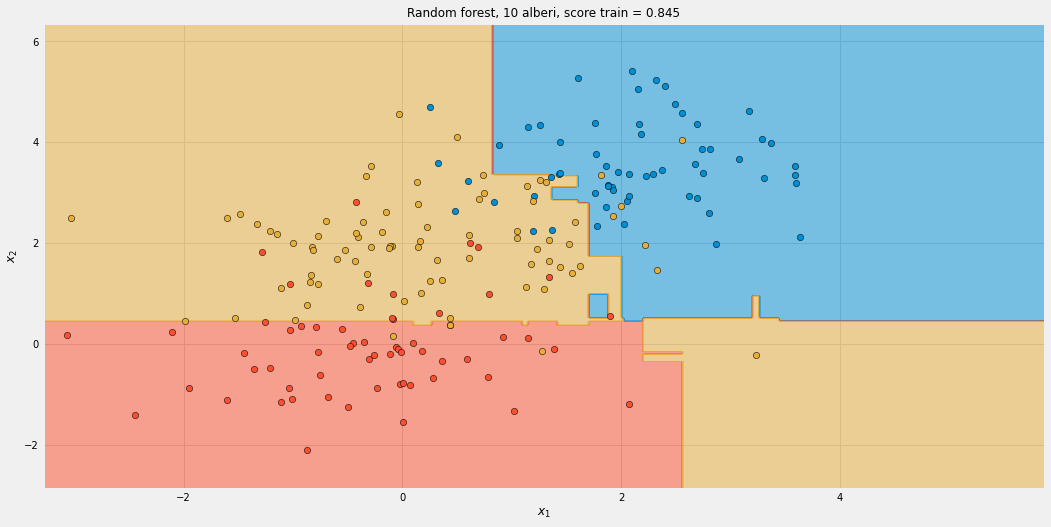

In [77]:
d = df
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cMap, alpha=.5)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title("Random forest, {0:d} alberi, score train = {1:3.3f}".format(n_estimators, scores_train), fontsize=12)
plt.show()

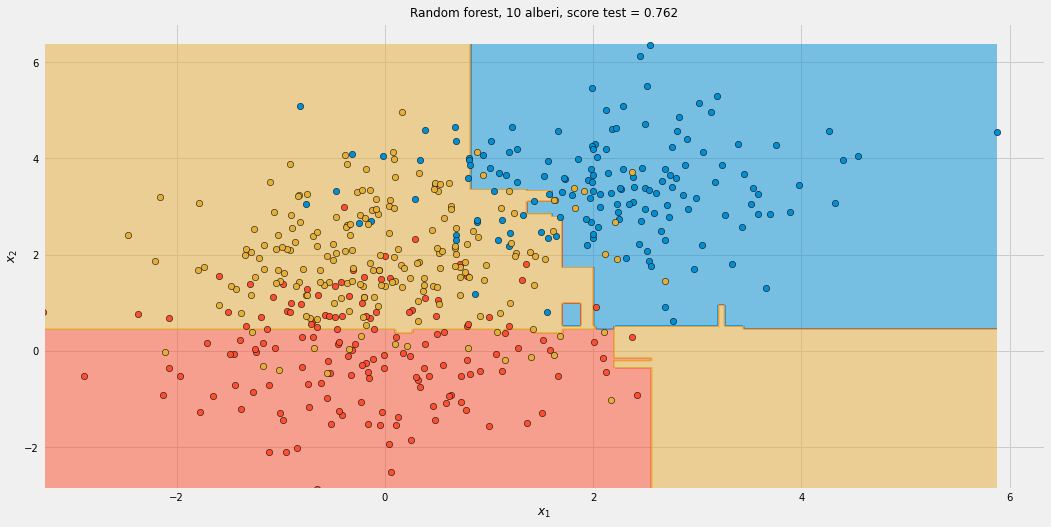

In [78]:
d = dft
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cMap, alpha=.5)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title("Random forest, {0:d} alberi, score test = {1:3.3f}".format(n_estimators, scores_test), fontsize=12)
plt.show()

In [79]:
scores = []
r = range(1,30)
for k in r:
    score = cross_val_score(estimator=RandomForestClassifier(n_estimators=k), X=df_all[['x1','x2']], y=df_all['class'], cv=10, scoring='accuracy')
    scores.append(score.mean())

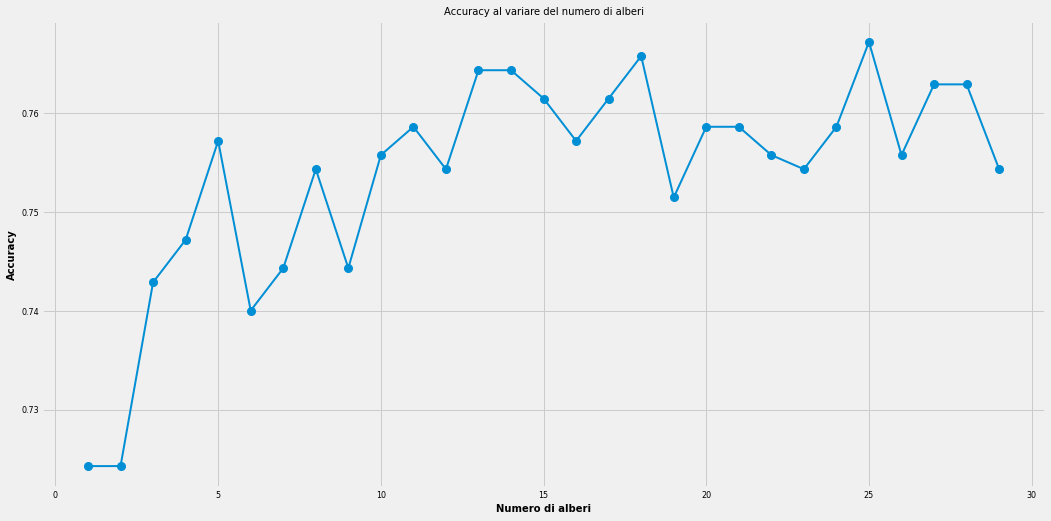

In [80]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.plot(r, scores, marker='o') 
plt.xlabel(r'Numero di alberi')
plt.ylabel('Accuracy')
plt.title(r'Accuracy al variare del numero di alberi')
plt.show()

In [81]:
n_estimators = 15
md = 2
classifier = DecisionTreeClassifier(max_depth=md)
clf = AdaBoostClassifier(classifier,n_estimators=n_estimators)

clf = clf.fit(df[['x1','x2']], df['class'])

scores_train = clf.score(df[['x1','x2']], df['class'])
scores_test = clf.score(dft[['x1','x2']], dft['class'])

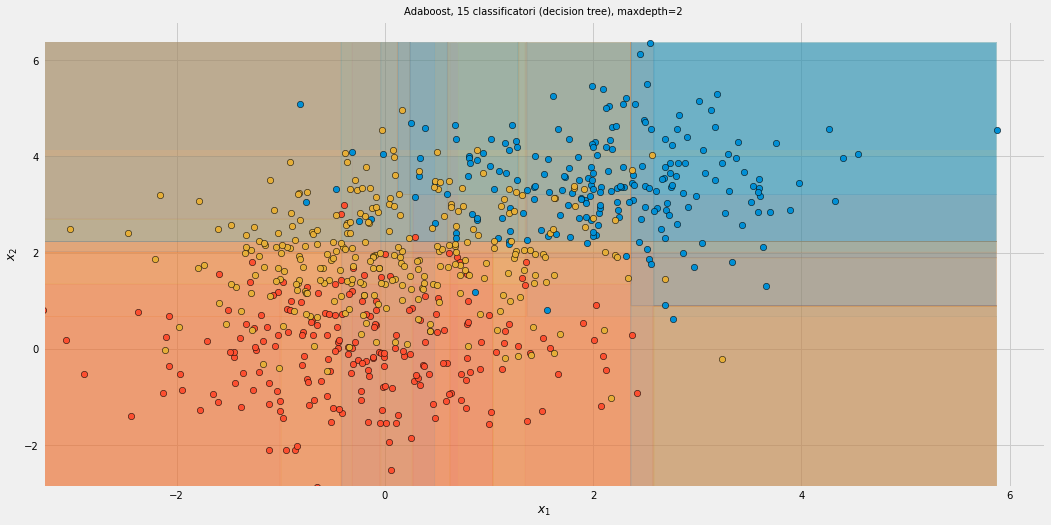

In [82]:
d = df_all
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
estimator_alpha = 1.0 / len(clf.estimators_)
for tree in clf.estimators_:
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cMap)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title("Adaboost, {1:d} classificatori (decision tree), maxdepth={0:d}".format(md, len(clf.estimators_), scores_train, scores_test))
plt.show()

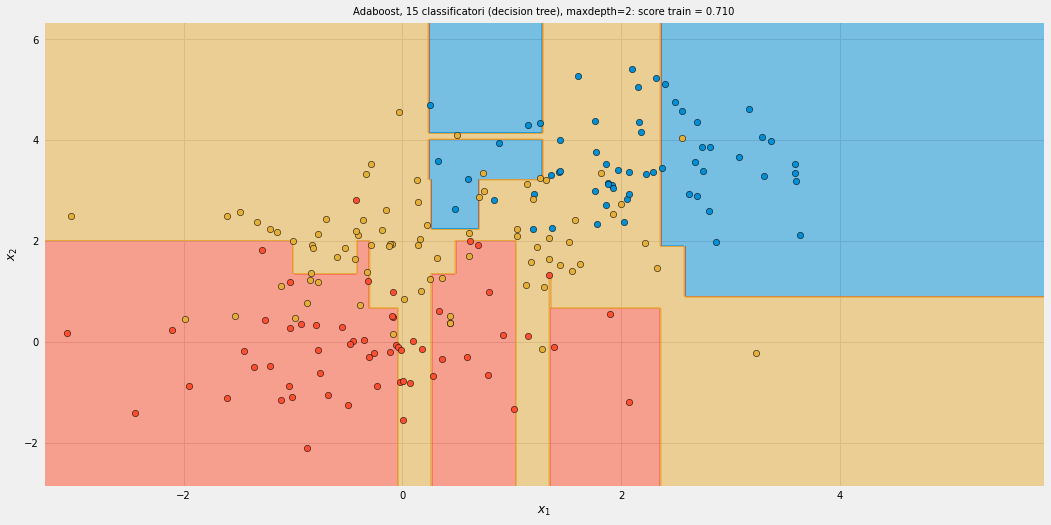

In [83]:
d = df
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
estimator_alpha = 0.5
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cMap)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title("Adaboost, {1:d} classificatori (decision tree), maxdepth={0:d}: score train = {2:3.3f}".format(md, len(clf.estimators_), scores_train))
plt.show()

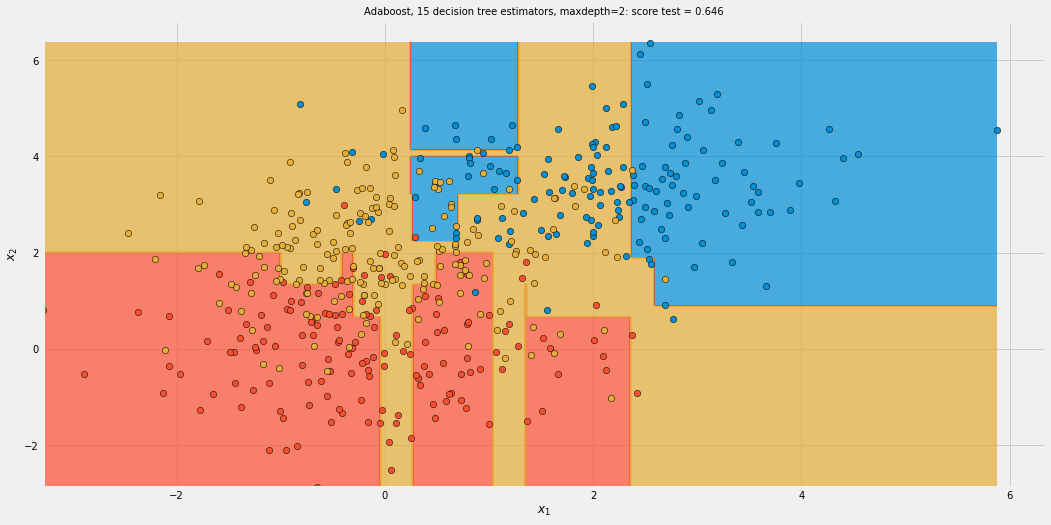

In [84]:
d = dft
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
estimator_alpha = 0.7
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cMap)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title("Adaboost, {1:d} decision tree estimators, maxdepth={0:d}: score test = {2:3.3f}".format(md, len(clf.estimators_), scores_test))
plt.show()

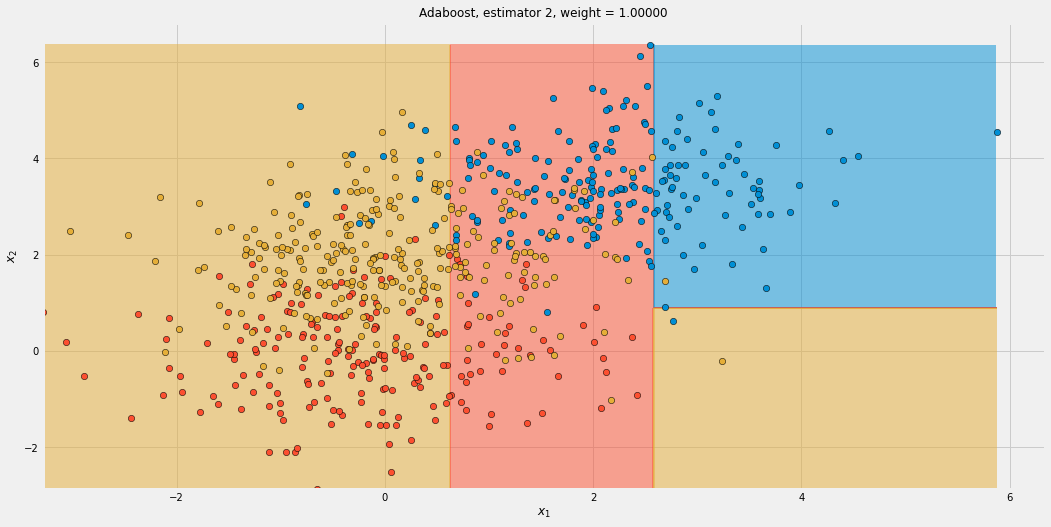

In [86]:
est_n = 2
d = df_all
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
xx, yy = np.meshgrid(np.arange(x1min, x1max, plot_step), np.arange(x2min, x2max, plot_step))
estimator_alpha = .5
tree = clf.estimators_[est_n]
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cMap)

for cl in range(1,n_classes+1):
    data = d[d['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[cl-1], s=40, edgecolors='k', marker='o', alpha=1, label='Class {0:d}'.format(cl-1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title("Adaboost, estimator {0:d}, weight = {1:3.5f}".format(est_n, clf.estimator_weights_[est_n]), fontsize=12)
plt.show()

In [87]:
scores = []
md = 2
r = range(1,30)
for k in r:
    score = cross_val_score(estimator=AdaBoostClassifier(DecisionTreeClassifier(max_depth=md),n_estimators=k, algorithm='SAMME'), X=df_all[['x1','x2']], y=df_all['class'], cv=10, scoring='accuracy')
    scores.append(score.mean())

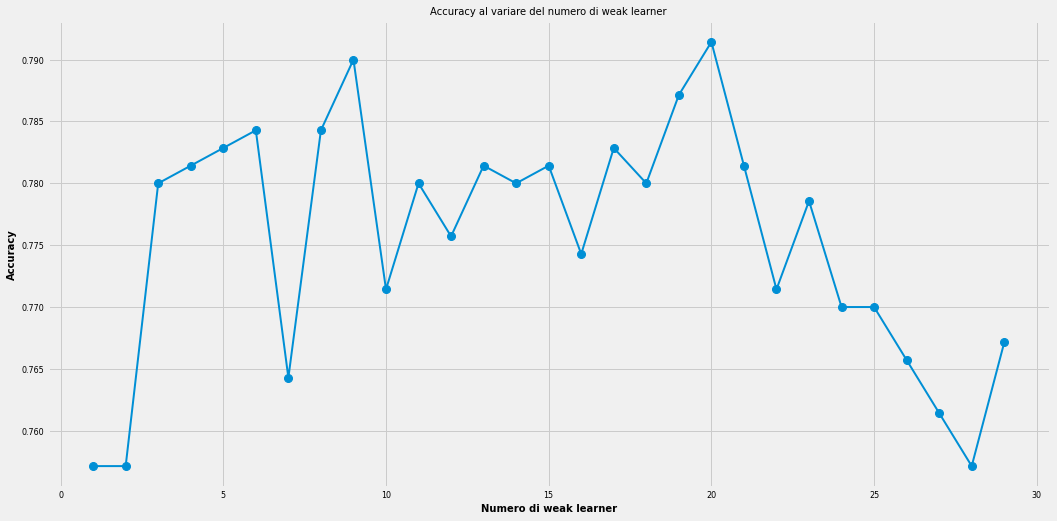

In [88]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.plot(r, scores, marker='o') 
plt.xlabel(r'Numero di weak learner')
plt.ylabel('Accuracy')
plt.title(r'Accuracy al variare del numero di weak learner')
plt.show()